In [173]:
import numpy as np
import matplotlib.pyplot as plt

In [174]:
k = 2*np.pi
beta = 1
n = 100000
sigma = np.sqrt( 1/(k*beta) )
P_max = np.sqrt( (beta*k)/(2*np.pi) )
x_all = []
xmax = 3*sigma
xmin = -3*sigma

In [175]:
def E(x):
    return 0.5*k*x**2

In [176]:

for i in range(n):
    x =  np.random.uniform(xmax, xmin)
    P = np.exp(-beta*E(x))
    gama = np.random.uniform(0, P_max)
    
    if gama < P:
        x_all.append(x)




In [177]:
xl = np.arange(xmin, xmax, 0.001)
yl=np.exp(-0.5*beta*k*xl**2)

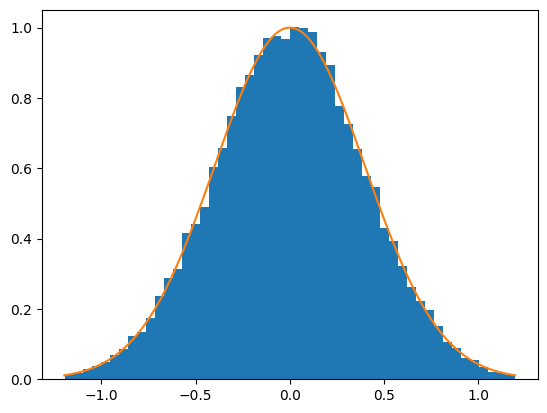

In [178]:
plt.hist(x_all, bins = 50, density=True)
plt.plot(xl, yl)
plt.show()

In [179]:
np.mean(x_all)

-0.0005711558136717239

In [180]:
np.std(x_all) - 1/np.sqrt(beta*k)

-0.005283291613761565

## 2

In [181]:
def V(x):
    return x**4 - 4*x**2

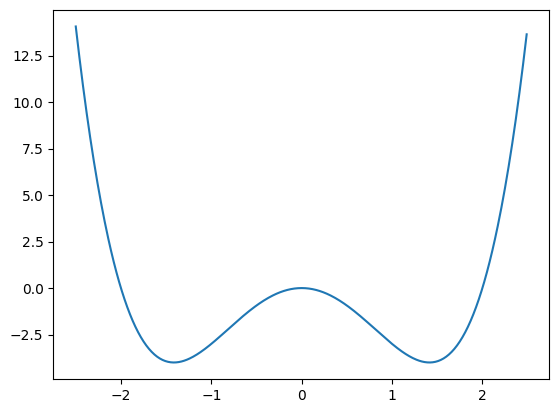

In [182]:
plt.plot(np.arange(-2.5,2.5,0.01), [V(x) for x in np.arange(-2.5,2.5,0.01)], '-')
#plt.ylim(-4,1)

In [183]:
x0 = np.random.uniform(-2.5,2.5)
x0 = 0

print('x0: ', x0)

passo= 0.1



n = 100000
x_all = []
V_all = []
for i in range(n):
    delta = np.random.choice([-passo, passo])
    x_novo = x0 + delta

    delta_V = V(x_novo) - V(x0)
    p_min = np.min([1, np.exp(-beta*delta_V)])
    
    r = np.random.uniform(0,1)
    if r < p_min:
        x0 = x_novo
        x_all.append(x_novo)
    else:   
        x_all.append(x0)

    


x0:  0


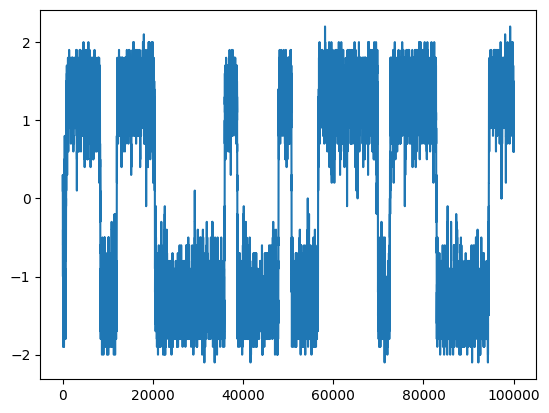

In [184]:
plt.plot(np.arange(n), x_all, '-')
plt.show()


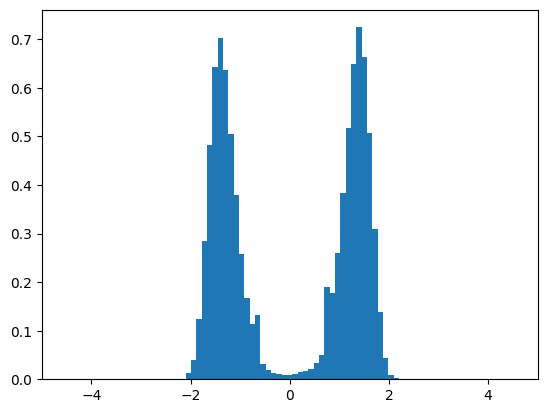

In [188]:
plt.hist(x_all, bins = 40, density=True)
plt.xlim(-5,5)
plt.show()

In [ ]:
x0 = np.random.uniform(-2.5,2.5)
x0 = 0

print('x0: ', x0)

passo= 0.1



n = 100000
x_all = []
V_all = []
for i in range(n):
    delta = np.random.choice([-passo, passo])
    x_novo = x0 + delta

    delta_V = V(x_novo) - V(x0)
    p_min = np.min([1, np.exp(-beta*delta_V)])
    
    r = np.random.uniform(0,1)
    if r < p_min:
        x0 = x_novo
        x_all.append(x_novo)
    else:   
        x_all.append(x0)

    


## 3

In [231]:
s = 0
n_max = 100000
k = 4
for n in range(n_max):
    x = np.random.exponential(1)
    s = s + ((x**(k-1))/(1-np.exp(-x)))

z = s/n_max
print('z: ', z/6)

print('zeta:',  (np.pi**4)/90)

    

z:  1.0859087032826913
zeta: 1.082323233711138


## 4
